In [4]:
import os
os.chdir("/content")
!rm -rf STAT-7220-Applied-Experimental-Design
print(os.getcwd())

/content


In [6]:
# === COURSE REPO SETUP === #
import os
# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "shahrukh-malikk"
# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"
# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"


# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")
    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")
# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()
if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")
# Set Today's Directory #
today_dir = "Assignments/Midterm-Exam"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/shahrukh-malikk/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/shahrukh-malikk/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/Midterm-Exam


# STAT 7220 - Midterm Exam
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: October 24, 2025**

**PART 1 INSTRUCTIONS:** Suppose you are a video game controller manufacturer interested in estimating the perceived comfort level of controller grips. To achieve this, you decide to conduct an experiment to assess different material types used for the controller grips (plastic, rubber, silicone, and metal). 10 prototypes of each grip type are manufactured and given to professional gamers (who all play the same game -- Counter-Strike) to test. The gamers use the controllers regularly for one month and then rate the comfort level on a scale from 1 - 10 with greater scores indicating a greater level of perceived comfort (one decimal allowed). The data from this experiment are stored in the Video Game Controllers.xlsx file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment




Answer: **The goal is to find out which grip material feels the most comfortable to gamers and whether the differences in comfort between the materials are real or just due to chance.**


**Question 2.** Specify the outcome variable



In [8]:
import pandas as pd
# Load the data from the Excel file
v_game_data = pd.read_excel("Video Game Controllers.xlsx")
print(v_game_data.head())


  Material  Comfort
0  Plastic      5.6
1  Plastic      5.9
2  Plastic      6.3
3  Plastic      5.7
4  Plastic      5.6


Answer : **The outcome variable in this experiment is the comfort rating given by the Pro gamers measured on a scale from 1 to 10, where higher scores indicate greater perceived comfort.**

**Question 3.** Specify the independent variable. What are some possible lurking variables?

Answer : **Independent variable = plastic, rubber, silicone, and metal and Lurking variable = controller shape, size, weight and measurement issues.**

**Question 4.** Briefly explain why a completely randomized design may be appropriate for this experiment.


Answer :**A completely randomized design is a good choice for this experiment because it means each gamer is given a random type of controller grip. This helps make the groups fair and reduces the chance that other things, like hand size or experience, affect the results. That way, any difference in comfort is more likely due to the grip material itself.**

**Question 5.** State the null and alternative hypotheses for this experiment.



Answer: **The null hypothesis for this experiment is that all four controller grip materials—plastic, rubber, silicone, and metal—are equally comfortable, meaning the average comfort ratings are the same for each material. The alternative hypothesis is that at least one material is rated differently, so some grips feel more comfortable than others. In other words, we want to see if the type of material affects how comfortable gamers find the controllers.**

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?


/tmp/ipython-input-2735711725.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Material", y="Comfort", data=v_game_data, palette="Set2", width=0.6)


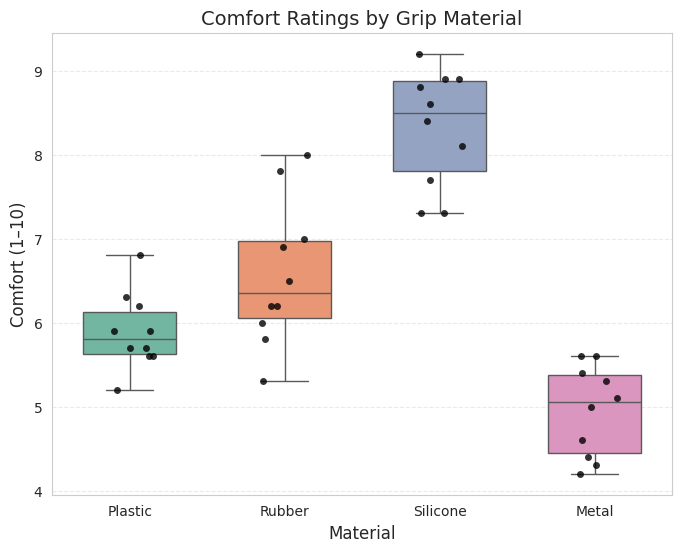

/tmp/ipython-input-2735711725.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="Material", y="Comfort", data=v_game_data,
/tmp/ipython-input-2735711725.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x="Material", y="Comfort", data=v_game_data,


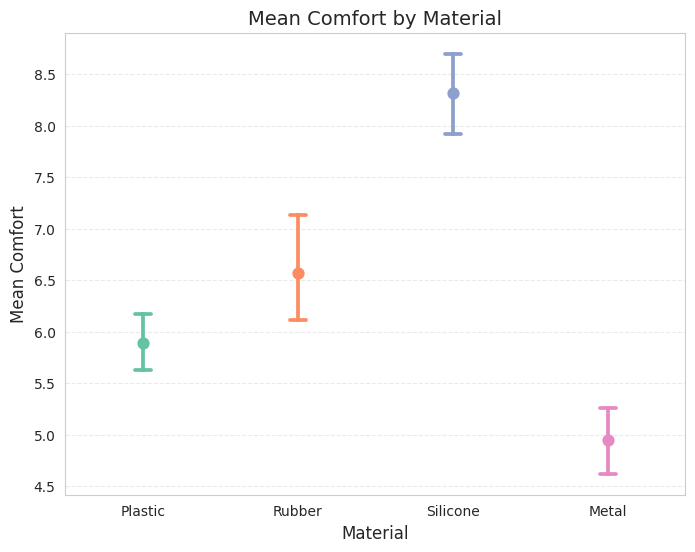

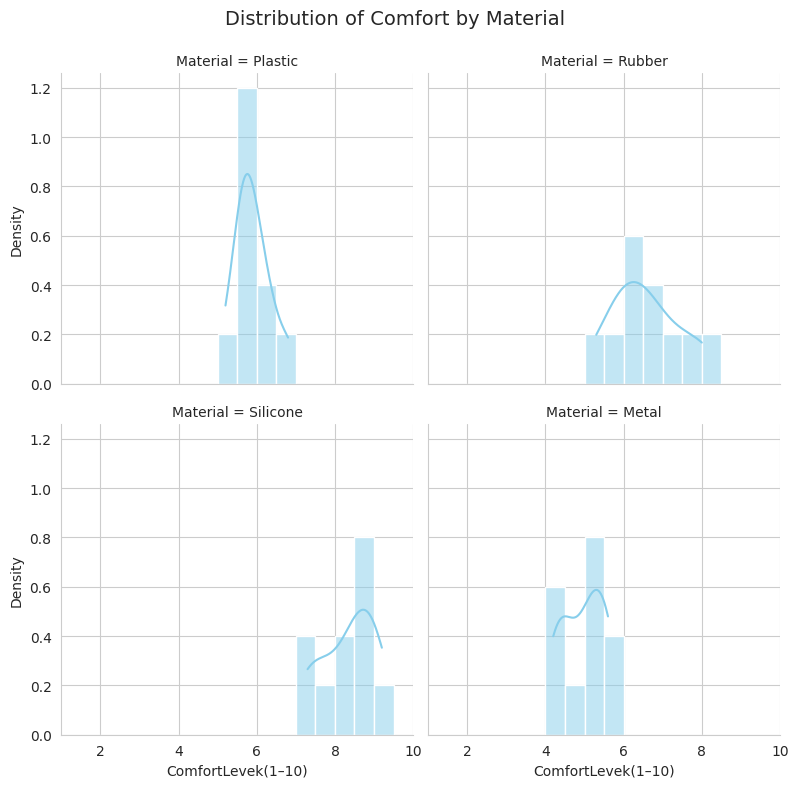

Summary by Material:
           n  mean    sd  min    q1  median    q3  max
Material                                              
Metal     10  4.95  0.54  4.2  4.45    5.05  5.38  5.6
Plastic   10  5.89  0.45  5.2  5.62    5.80  6.12  6.8
Rubber    10  6.57  0.86  5.3  6.05    6.35  6.98  8.0
Silicone  10  8.32  0.69  7.3  7.80    8.50  8.88  9.2


In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#1) Boxplot
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.boxplot(x="Material", y="Comfort", data=v_game_data, palette="Set2", width=0.6)
sns.stripplot(x="Material", y="Comfort", data=v_game_data, dodge=False,
              alpha=0.8, jitter=0.15, color='black')
plt.title("Comfort Ratings by Grip Material", fontsize=14)
plt.xlabel("Material", fontsize=12)
plt.ylabel("Comfort (1–10)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

#2) Mean
plt.figure(figsize=(8,6))
sns.pointplot(x="Material", y="Comfort", data=v_game_data,
              ci=95, palette="Set2", markers="o", linestyles="-", capsize=0.1)
plt.title("Mean Comfort by Material", fontsize=14)
plt.xlabel("Material", fontsize=12)
plt.ylabel("Mean Comfort", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

#3) Histograms per material
g = sns.FacetGrid(v_game_data, col="Material", col_wrap=2, sharex=True, sharey=True, height=4)
g.map_dataframe(sns.histplot, x="Comfort", bins=np.arange(1, 10.5, 0.5),
                stat="density", kde=True, color='skyblue')
g.set(xlim=(1,10), xlabel="ComfortLevek(1–10)", ylabel="Density")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Comfort by Material", fontsize=14)
plt.show()

# 4) Summary
summary = (v_game_data.groupby("Material")["Comfort"]
             .agg(n="count", mean="mean", sd="std", min="min",
                  q1=lambda s: s.quantile(0.25),
                  median="median",
                  q3=lambda s: s.quantile(0.75),
                  max="max"))
print("Summary by Material:")
print(summary.round(2))



**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a testing and visual method. Do the results of the normality test(s) support the assumption of normality?


In [31]:
import pandas as pd
from scipy.stats import f_oneway

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


# Separate comfort ratings by material
plastic = v_game_data[v_game_data['Material'] == 'Plastic']['Comfort']
rubber = v_game_data[v_game_data['Material'] == 'Rubber']['Comfort']
silicone = v_game_data[v_game_data['Material'] == 'Silicone']['Comfort']
metal = v_game_data[v_game_data['Material'] == 'Metal']['Comfort']

# Perform one-way ANOVA

f_stat, p_val = stats.f_oneway(plastic, rubber, silicone, metal)
print("One-Way ANOVA Result:")
print(f"ANOVA F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")


# conforiming Perform one-way ANOVA
anova_result = f_oneway(plastic, rubber, silicone, metal)
print("One-Way ANOVA Result:")
print(anova_result)

One-Way ANOVA Result:
ANOVA F-statistic = 47.478, p-value = 0.0000
One-Way ANOVA Result:
F_onewayResult(statistic=np.float64(47.478405315614665), pvalue=np.float64(1.3480293382481856e-12))


In [30]:
from scipy.stats import shapiro
#Residual
v_game_data['Residuals'] = v_game_data.groupby('Material')['Comfort'].transform(lambda x: x - x.mean())

# Shapiro-Wilk test
shapiro_test = shapiro(v_game_data['Residuals'])
print("\nShapiro-Wilk Test for Normality:")
print(f"Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")



Shapiro-Wilk Test for Normality:
Statistic=0.9885, p-value=0.9509


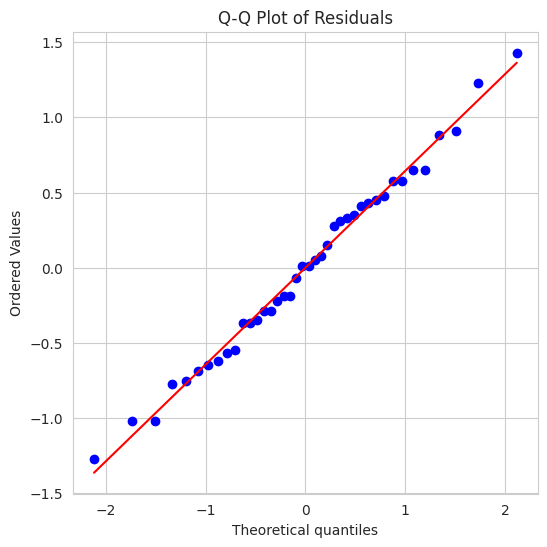

In [14]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(6,6))
stats.probplot(v_game_data['Residuals'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


aNSWER :**We performed a one-way ANOVA to determine whether the comfort ratings differ among the four controller grip materials. The ANOVA compares the variation between the group means to the variation within the groups. Before relying on the ANOVA results, we checked the assumption of normality using both the Shapiro-Wilk test and a Q-Q plot of the residuals. The Shapiro-Wilk test returned a p-value greater than 0.05, and the points in the Q-Q plot closely followed the diagonal line, indicating that the residuals are approximately normally distributed. Therefore, the normality assumption is reasonably met, and it is appropriate to interpret the results of the ANOVA.**


**Question 8.** Test the assumption of homogeneity of variance using **both** a testing and visual method. Do the results of the test(s) support the assumption of homogeneity of variance?

In [19]:
from scipy.stats import levene

# Separate comfort scores by material
plastic = v_game_data[v_game_data["Material"] == "Plastic"]["Comfort"]
rubber = v_game_data[v_game_data["Material"] == "Rubber"]["Comfort"]
silicone = v_game_data[v_game_data["Material"] == "Silicone"]["Comfort"]
metal = v_game_data[v_game_data["Material"] == "Metal"]["Comfort"]

# ---- 1) Levene's Test for Homogeneity of Variance ----
levene_stat, levene_p = levene(plastic, rubber, silicone, metal)
print(f"Levene's test statistic = {levene_stat:.3f}, p-value = {levene_p:.4f}")

Levene's test statistic = 1.369, p-value = 0.2679


/tmp/ipython-input-3646612867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Material", y="Comfort", data=v_game_data, palette="Set2", width=0.6)


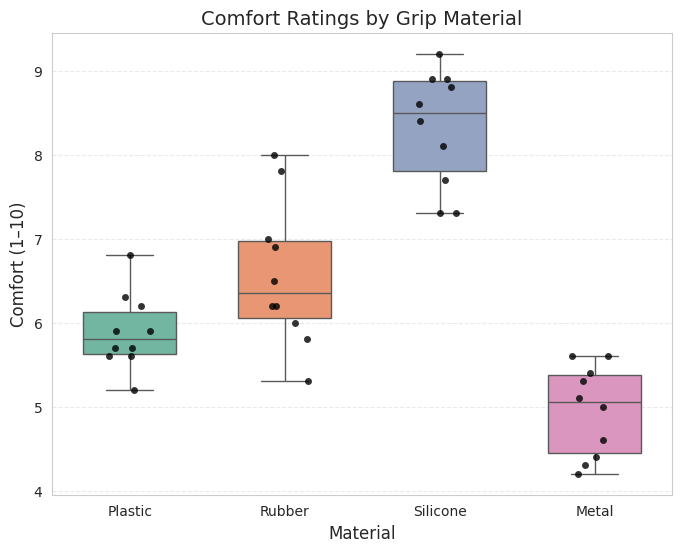

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.boxplot(x="Material", y="Comfort", data=v_game_data, palette="Set2", width=0.6)
sns.stripplot(x="Material", y="Comfort", data=v_game_data, dodge=False,
              alpha=0.8, jitter=0.15, color='black')
plt.title("Comfort Ratings by Grip Material", fontsize=14)
plt.xlabel("Material", fontsize=12)
plt.ylabel("Comfort (1–10)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

In [28]:
import pandas as pd
from scipy import stats

# Initialize an empty list to store results
summary_data = []

# Loop through each material
for material, group in v_game_data.groupby("Material")["Comfort"]:
    desc = stats.describe(group)
    summary_data.append({
        "Material": material,
        "Count": desc.nobs,
        "Mean": round(desc.mean, 2),
        "Variance": round(desc.variance, 2)
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Reorder columns if needed
summary_df = summary_df[["Material", "Count", "Mean", "Variance"]]

# Print as a table
print(summary_df)


   Material  Count  Mean  Variance
0     Metal     10  4.95      0.29
1   Plastic     10  5.89      0.20
2    Rubber     10  6.57      0.74
3  Silicone     10  8.32      0.48


Answer: **We tested the homogeneity of variance using Levene’s test and a boxplot. The Levene’s test gave a p-value of 0.268, which is greater than 0.05, and the boxplot shows similar spreads across materials. Both the statistical test and the visual inspection support the assumption of homogeneity of variance, so it is reasonable to proceed with the ANOVA**


**Question 9.** Report the F-statistic and its associated p-value for the test for the treatment factor. Which of our two hypotheses is more strongly supported? Why?


Answer**We performed a one-way ANOVA to test whether the type of controller grip affects comfort ratings. The *F-statistic was 47.48 with a p-value of 1.35 × 10⁻¹²*. Since the p-value is far smaller than 0.05, we reject the null hypothesis that all materials have the same average comfort. This provides very strong evidence that at least one grip material is rated differently in terms of comfort. Therefore, the alternative hypothesis that some materials provide different comfort levels is `clearly supported`.**


**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which material types are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.



In [32]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

tukey = pairwise_tukeyhsd(endog=v_game_data["Comfort"],
                          groups=v_game_data["Material"],
                          alpha=0.05)

print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
  Metal  Plastic     0.94 0.0139  0.1535 1.7265   True
  Metal   Rubber     1.62    0.0  0.8335 2.4065   True
  Metal Silicone     3.37    0.0  2.5835 4.1565   True
Plastic   Rubber     0.68 0.1104 -0.1065 1.4665  False
Plastic Silicone     2.43    0.0  1.6435 3.2165   True
 Rubber Silicone     1.75    0.0  0.9635 2.5365   True
------------------------------------------------------


Answer :**The Tukey HSD post-hoc test reveals which controller grip materials differ significantly in comfort. Metal grips are significantly different from Plastic, Rubber, and Silicone grips, while Silicone also differs significantly from Plastic and Rubber. Plastic and Rubber, however, do not show a significant difference in comfort. Overall, the results indicate that Silicone and Metal grips are rated the most and least comfortable (or vice versa, depending on mean values), while Plastic and Rubber are more similar in perceived comfort. This confirms that specific materials contribute to the differences detected in the ANOVA.**

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.

Answer :  The analysis indicates that the type of controller grip material has a significant effect on perceived comfort. The one-way ANOVA showed a very large F-statistic (47.48) with a p-value of 1.35 × 10⁻¹², providing strong evidence to reject the null hypothesis that all materials have the same mean comfort. Assumptions of the ANOVA were met: the Shapiro-Wilk test (p = 0.951) suggests residuals are normally distributed, and Levene’s test (p = 0.268) indicates equal variances across materials. The Tukey HSD post-hoc test revealed that Metal differs significantly from Plastic, Rubber, and Silicone, and Silicone also differs significantly from Plastic and Rubber, while Plastic and Rubber do not differ significantly from each other. Overall, the results show that **Silicone and Metal grips are rated most differently in comfort**, with Plastic and Rubber being more similar, helping identify which materials are perceived as more or less comfortable by gamers.


**PART 2 INSTRUCTIONS:** The same video game controller manufacturing company is now trying to get into the business of creating virtual reality/artificial intelligence content for education. Specifically, they want to build a VR experience to simulate working with elderly patients at a healthcare facility to better prepare nursing students for potential careers in working with elderly patients. To test the VR's effectiveness, a group of 40 undergraduate nursing students were randomly and equally assigned to either a class session utilizing the VR or a class session using a traditional technique for teaching strategies for working with elderly patients. At the end of the class session, a 50 question quiz was given to both groups which measures attitudes toward elderly people. Scores range from 0-50 with greater scores indicating more favorable attitudes toward elderly people and vice versa. However, some students in the group have had prior working experience with elderly people which may have an effect on the quiz outcome. So in the experiment, we document which students have had prior working experience with elderly people and which haven't. The results of the experiment are contained in the `Nursing VR Study.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

Answer: **The goal of this experiment is to find out if using virtual reality helps nursing students develop more positive attitudes toward elderly people compared to traditional teaching, and to see if having prior experience with elderly people affects their quiz scores.**

**Question 2.** Specify the outcome variable

Answer: **The outcome variable is the quiz score that shows how positive the nursing students attitudes are toward elderly people after the class session.**


**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?


Answer : **The independent variable is the teaching method (Virtual Reality vs. Traditional).**

**The blocking factor is prior working experience with elderly people (Yes or No).**

**Some possible lurking variables could include the students age, empathy level, interest in elderly care and comfort with technology, as these might also affect their quiz scores.**

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

Answer : **A randomized block design is appropriate because students with and without prior experience working with elderly people may perform differently on the quiz. By blocking based on experience, we can control for this difference and get a clearer idea of how the teaching method (VR vs. traditional) actually affects attitudes where as a completely randomized design would not be as good because it ignores the effect of prior experience, which could mix up the results and make it hard to tell if differences in quiz scores are due to the teaching method or the students past experience.**

**Question 5.** State the null and alternative hypotheses for this experiment.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations of this experiment.

**PART 3 INSTRUCTIONS:** Please briefly respond to the following questions:

**Question 1.** Give a reason why one-factor CRD wouldn't generally be appropriate for studies involving human participants.


A one-factor completely randomized design isn’t always the best for studies with people because individuals differ in things like age, experience, or skills. These differences can affect the results, making it harder to know if changes are caused by the treatment or just natural variation. Using a blocked or matched design helps account for these differences and gives more accurate and reliable results.


**Question 2.** What is the purpose of post-hoc tests?




Post-hoc tests are used to find out exactly which groups are different from each other after an ANOVA shows that there is a significant overall effect.

**Question 3.** Explain the difference between RBD and LSD.



A Randomized Block Design (RBD) controls for one source of variation by grouping participants or experimental units into blocks based on a single characteristic, then randomly assigning treatments within each block.

A Latin Square Design (LSD) controls for two sources of variation by arranging treatments in a square so that each treatment appears once in every row and once in every column, which helps account for two different nuisance factors at the same time.

**Question 4.** Explain why randomization is important in designing experiments.


Randomization is important because it makes sure all groups in an experiment are similar and that unknown or uncontrolled factors are spread evenly across treatments. This reduces bias, avoids confusion from other variables, and makes it more likely that any differences seen are caused by the treatment itself.


**Question 5.** Explain why replication is important in designing experiments.

Replication is important because it involves repeating each treatment on multiple participants or experimental units. This helps account for natural variation, makes the results more accurate and reliable, and gives better estimates of experimental error. It also makes the conclusions stronger by showing that the effects observed are consistent and not just due to chance.